Loading the file extracted from Ansys simulation

In [1]:
ls

Desired Data Accumulation With Python From  File Extracted From Ansys Simulation.ipynb
non-newtonian-pulsatile_70-30_30-30.csv
README.md


In [2]:
import pandas as pd
file=pd.read_csv('non-newtonian-pulsatile_70-30_30-30.csv', header=None, skiprows=4)
file.columns=['x', 'v']
file.head(10)

,x,v
0,X [ m ],Wall Shear [ Pa ]
1,4.00000019e-003,6.96732950e+000
2,undef,undef
3,-4.00000066e-003,6.98735380e+000
4,[Name],NaN
5,cc2 for Case FFF at cc2,NaN
6,[Data],NaN
7,X [ m ],Wall Shear [ Pa ]
8,4.00000019e-003,6.75192547e+000
9,undef,undef


In [3]:
file.tail(10)

,x,v
6147,7.79411988e-004,2.55396252e+001
6148,undef,undef
6149,5.62915066e-003,1.61713168e-001
6150,[Name],NaN
6151,ec2 for Case FFF 4.95 at ec2,NaN
6152,[Data],NaN
6153,X [ m ],Wall Shear [ Pa ]
6154,5.06839994e-003,5.48503065e+000
6155,undef,undef
6156,9.83154215e-003,1.11144400e+000


In [4]:
file.shape

(6157, 2)

The file is in completely mess. I will have to collect only 'Wall Shear [Pa]' for diffent times from 4.30s to 5.16s for different case such as 'cc1, cc2, cc3, cc4, ss1, ss3, ss6, ec1, ec2, ec3'. So, let's get started!

In [5]:
import numpy as np

In [6]:
def time_string(section):
    time=np.linspace(4.30, 5.16, 87)
    strings=[]
    for i in time:
        string=str(section)+' for Case FFF {:.2f} at '.format(i)+str(section)
        strings.append(string)
    return strings

In [7]:
time_string('cc1')

['cc1 for Case FFF 4.30 at cc1',
 'cc1 for Case FFF 4.31 at cc1',
 'cc1 for Case FFF 4.32 at cc1',
 'cc1 for Case FFF 4.33 at cc1',
 'cc1 for Case FFF 4.34 at cc1',
 'cc1 for Case FFF 4.35 at cc1',
 'cc1 for Case FFF 4.36 at cc1',
 'cc1 for Case FFF 4.37 at cc1',
 'cc1 for Case FFF 4.38 at cc1',
 'cc1 for Case FFF 4.39 at cc1',
 'cc1 for Case FFF 4.40 at cc1',
 'cc1 for Case FFF 4.41 at cc1',
 'cc1 for Case FFF 4.42 at cc1',
 'cc1 for Case FFF 4.43 at cc1',
 'cc1 for Case FFF 4.44 at cc1',
 'cc1 for Case FFF 4.45 at cc1',
 'cc1 for Case FFF 4.46 at cc1',
 'cc1 for Case FFF 4.47 at cc1',
 'cc1 for Case FFF 4.48 at cc1',
 'cc1 for Case FFF 4.49 at cc1',
 'cc1 for Case FFF 4.50 at cc1',
 'cc1 for Case FFF 4.51 at cc1',
 'cc1 for Case FFF 4.52 at cc1',
 'cc1 for Case FFF 4.53 at cc1',
 'cc1 for Case FFF 4.54 at cc1',
 'cc1 for Case FFF 4.55 at cc1',
 'cc1 for Case FFF 4.56 at cc1',
 'cc1 for Case FFF 4.57 at cc1',
 'cc1 for Case FFF 4.58 at cc1',
 'cc1 for Case FFF 4.59 at cc1',
 'cc1 for 

In [8]:
def section_file(section, l, r):
    left=str(section) + '_left'
    right=str(section) + '_right'
    dict_section={'Time':[], left:[], right:[]}
    times=np.linspace(4.30, 5.16, 87)
    time=[]
    lft=[]
    rht=[]
    for i, v in enumerate(file['x']):
        for s in time_string(section):
            if s==v:
                box=file.iloc[i:i+10]
                string=v
                for v in box['v']:
                    w=list(box['v'])
                    index=time_string(section).index(string)
                    t=times[index]
                    time.append(t)
                    lft.append(w[l])
                    rht.append(w[r])
                    break
                    
    dict_section['Time']=time
    dict_section[left]=lft
    dict_section[right]=rht
    return dict_section   

In [9]:
def magic_box(section):
    for i, v in enumerate(file['x']):
        for s in time_string(section):
            if s==v:
                box=file.iloc[i:i+10]
    return box

In [10]:
magic_box('cc1')

,x,v
6088,cc1 for Case FFF 4.95 at cc1,NaN
6089,[Data],NaN
6090,X [ m ],Wall Shear [ Pa ]
6091,4.00000019e-003,2.33678961e+000
6092,undef,undef
6093,-4.00000066e-003,2.36020255e+000
6094,[Name],NaN
6095,ec3 for Case FFF 4.95 at ec3,NaN
6096,[Data],NaN
6097,X [ m ],Wall Shear [ Pa ]


In [11]:
cc1=section_file('cc1', 5, 3)


In [12]:
print(pd.DataFrame(cc1).sort_values(by='Time'))

    Time          cc1_left         cc1_right
81  4.30   1.28895366e+000   1.26494133e+000
56  4.31   1.38808167e+000   1.36302519e+000
42  4.32   1.42698348e+000   1.40123844e+000
20  4.33   1.42235291e+000   1.39568532e+000
31  4.34   1.38723016e+000   1.36089635e+000
83  4.35   1.37783694e+000   1.35174394e+000
38  4.36   1.37114346e+000   1.34541452e+000
35  4.37   1.33289194e+000   1.30845714e+000
8   4.38   1.29891562e+000   1.27518606e+000
62  4.39   1.27617145e+000   1.25254607e+000
65  4.40   1.28114712e+000   1.25702763e+000
36  4.41   1.31045687e+000   1.28522563e+000
39  4.42   1.31686628e+000   1.29134250e+000
53  4.43   1.31951773e+000   1.29406714e+000
26  4.44   9.74877477e-001   9.59711730e-001
45  4.45   7.93426931e-001   7.81874299e-001
19  4.46   6.67531490e-001   6.57651365e-001
72  4.47   5.95582426e-001   5.86923540e-001
70  4.48   5.06941855e-001   5.00458002e-001
64  4.49   4.44338769e-001   4.39729124e-001
1   4.50   4.05579209e-001   4.02078092e-001
22  4.51  

In [13]:
cc1=pd.DataFrame(cc1).sort_values(by='Time')
print(cc1)

    Time          cc1_left         cc1_right
81  4.30   1.28895366e+000   1.26494133e+000
56  4.31   1.38808167e+000   1.36302519e+000
42  4.32   1.42698348e+000   1.40123844e+000
20  4.33   1.42235291e+000   1.39568532e+000
31  4.34   1.38723016e+000   1.36089635e+000
83  4.35   1.37783694e+000   1.35174394e+000
38  4.36   1.37114346e+000   1.34541452e+000
35  4.37   1.33289194e+000   1.30845714e+000
8   4.38   1.29891562e+000   1.27518606e+000
62  4.39   1.27617145e+000   1.25254607e+000
65  4.40   1.28114712e+000   1.25702763e+000
36  4.41   1.31045687e+000   1.28522563e+000
39  4.42   1.31686628e+000   1.29134250e+000
53  4.43   1.31951773e+000   1.29406714e+000
26  4.44   9.74877477e-001   9.59711730e-001
45  4.45   7.93426931e-001   7.81874299e-001
19  4.46   6.67531490e-001   6.57651365e-001
72  4.47   5.95582426e-001   5.86923540e-001
70  4.48   5.06941855e-001   5.00458002e-001
64  4.49   4.44338769e-001   4.39729124e-001
1   4.50   4.05579209e-001   4.02078092e-001
22  4.51  

In [14]:
magic_box('cc2')

,x,v
6102,cc2 for Case FFF 4.95 at cc2,NaN
6103,[Data],NaN
6104,X [ m ],Wall Shear [ Pa ]
6105,4.00000019e-003,2.19116998e+000
6106,undef,undef
6107,-4.00000066e-003,2.57526994e+000
6108,[Name],NaN
6109,cc3 for Case FFF 4.95 at cc3,NaN
6110,[Data],NaN
6111,X [ m ],Wall Shear [ Pa ]


In [15]:
cc2=section_file('cc2', 5, 3)
print(pd.DataFrame(cc2).sort_values(by='Time'))

    Time          cc2_left         cc2_right
81  4.30   1.40522492e+000   1.18791449e+000
56  4.31   1.50808942e+000   1.28290653e+000
42  4.32   1.55118048e+000   1.32135201e+000
20  4.33   1.54735398e+000   1.31765103e+000
31  4.34   1.50966775e+000   1.28455544e+000
83  4.35   1.49767494e+000   1.27601635e+000
38  4.36   1.48924649e+000   1.27028525e+000
35  4.37   1.44795287e+000   1.23433971e+000
8   4.38   1.41046846e+000   1.20188916e+000
62  4.39   1.38488519e+000   1.18005621e+000
65  4.40   1.38931763e+000   1.18500805e+000
36  4.41   1.42040610e+000   1.21313107e+000
39  4.42   1.42828798e+000   1.21962237e+000
53  4.43   1.43172717e+000   1.22253287e+000
26  4.44   1.07907367e+000   8.99253488e-001
45  4.45   8.79862189e-001   7.27121532e-001
19  4.46   7.37502754e-001   6.08378410e-001
72  4.47   6.53859138e-001   5.41038811e-001
70  4.48   5.56638002e-001   4.57928479e-001
64  4.49   4.87280190e-001   3.98915887e-001
1   4.50   4.43701416e-001   3.62554491e-001
22  4.51  

In [16]:
cc2=pd.DataFrame(cc2).sort_values(by='Time')
print(cc2)

    Time          cc2_left         cc2_right
81  4.30   1.40522492e+000   1.18791449e+000
56  4.31   1.50808942e+000   1.28290653e+000
42  4.32   1.55118048e+000   1.32135201e+000
20  4.33   1.54735398e+000   1.31765103e+000
31  4.34   1.50966775e+000   1.28455544e+000
83  4.35   1.49767494e+000   1.27601635e+000
38  4.36   1.48924649e+000   1.27028525e+000
35  4.37   1.44795287e+000   1.23433971e+000
8   4.38   1.41046846e+000   1.20188916e+000
62  4.39   1.38488519e+000   1.18005621e+000
65  4.40   1.38931763e+000   1.18500805e+000
36  4.41   1.42040610e+000   1.21313107e+000
39  4.42   1.42828798e+000   1.21962237e+000
53  4.43   1.43172717e+000   1.22253287e+000
26  4.44   1.07907367e+000   8.99253488e-001
45  4.45   8.79862189e-001   7.27121532e-001
19  4.46   7.37502754e-001   6.08378410e-001
72  4.47   6.53859138e-001   5.41038811e-001
70  4.48   5.56638002e-001   4.57928479e-001
64  4.49   4.87280190e-001   3.98915887e-001
1   4.50   4.43701416e-001   3.62554491e-001
22  4.51  

In [17]:
magic_box('cc3')

,x,v
6109,cc3 for Case FFF 4.95 at cc3,NaN
6110,[Data],NaN
6111,X [ m ],Wall Shear [ Pa ]
6112,4.00000019e-003,1.69797206e+000
6113,undef,undef
6114,-4.00000066e-003,1.60426807e+000
6115,[Name],NaN
6116,cc4 for Case FFF 4.95 at cc4,NaN
6117,[Data],NaN
6118,X [ m ],Wall Shear [ Pa ]


In [18]:
cc3=section_file('cc3', 5, 3)
print(pd.DataFrame(cc3).sort_values(by='Time'))

    Time          cc3_left         cc3_right
81  4.30   9.06279147e-001   9.17239964e-001
56  4.31   1.02212799e+000   1.02102304e+000
42  4.32   1.04944742e+000   1.05935585e+000
20  4.33   1.02868581e+000   1.05379164e+000
31  4.34   9.80326116e-001   1.01962471e+000
83  4.35   9.68660414e-001   1.01191020e+000
38  4.36   9.59734619e-001   1.00608075e+000
35  4.37   9.15781975e-001   9.68894899e-001
8   4.38   8.84038985e-001   9.37995672e-001
62  4.39   8.68352771e-001   9.19434190e-001
65  4.40   8.85545909e-001   9.28568304e-001
36  4.41   9.27531958e-001   9.60992157e-001
39  4.42   9.36909258e-001   9.69466507e-001
53  4.43   9.42676425e-001   9.74824131e-001
26  4.44   5.42682767e-001   6.30644798e-001
45  4.45   3.86903971e-001   4.69605446e-001
19  4.46   2.91890860e-001   3.63038182e-001
72  4.47   2.54068792e-001   3.09897363e-001
70  4.48   1.94715604e-001   2.34817624e-001
64  4.49   1.65407464e-001   1.88753337e-001
1   4.50   1.57816768e-001   1.68960869e-001
22  4.51  

In [19]:
cc3=pd.DataFrame(cc3).sort_values(by='Time')
print(cc3)

    Time          cc3_left         cc3_right
81  4.30   9.06279147e-001   9.17239964e-001
56  4.31   1.02212799e+000   1.02102304e+000
42  4.32   1.04944742e+000   1.05935585e+000
20  4.33   1.02868581e+000   1.05379164e+000
31  4.34   9.80326116e-001   1.01962471e+000
83  4.35   9.68660414e-001   1.01191020e+000
38  4.36   9.59734619e-001   1.00608075e+000
35  4.37   9.15781975e-001   9.68894899e-001
8   4.38   8.84038985e-001   9.37995672e-001
62  4.39   8.68352771e-001   9.19434190e-001
65  4.40   8.85545909e-001   9.28568304e-001
36  4.41   9.27531958e-001   9.60992157e-001
39  4.42   9.36909258e-001   9.69466507e-001
53  4.43   9.42676425e-001   9.74824131e-001
26  4.44   5.42682767e-001   6.30644798e-001
45  4.45   3.86903971e-001   4.69605446e-001
19  4.46   2.91890860e-001   3.63038182e-001
72  4.47   2.54068792e-001   3.09897363e-001
70  4.48   1.94715604e-001   2.34817624e-001
64  4.49   1.65407464e-001   1.88753337e-001
1   4.50   1.57816768e-001   1.68960869e-001
22  4.51  

In [20]:
magic_box('cc4')

,x,v
6116,cc4 for Case FFF 4.95 at cc4,NaN
6117,[Data],NaN
6118,X [ m ],Wall Shear [ Pa ]
6119,5.56621980e-003,1.38326809e-001
6120,undef,undef
6121,-7.31793931e-003,3.40245456e-001
6122,[Name],NaN
6123,ss1 for Case FFF 4.95 at ss1,NaN
6124,[Data],NaN
6125,X [ m ],Wall Shear [ Pa ]


In [21]:
cc4=section_file('cc4', 5, 3)
print(pd.DataFrame(cc4).sort_values(by='Time'))

    Time          cc4_left         cc4_right
81  4.30   1.17796488e-001   6.97068870e-002
56  4.31   7.68422633e-002   1.48339599e-001
42  4.32   8.25133100e-002   1.66126639e-001
20  4.33   1.16856806e-001   1.47955015e-001
31  4.34   1.62008822e-001   1.07482135e-001
83  4.35   1.81185707e-001   9.30376723e-002
38  4.36   1.90501943e-001   8.50976333e-002
35  4.37   2.09657803e-001   5.44960834e-002
8   4.38   2.17566788e-001   3.31819803e-002
62  4.39   2.13472620e-001   2.72672046e-002
65  4.40   1.92146987e-001   5.02685755e-002
36  4.41   1.61148608e-001   8.75444114e-002
39  4.42   1.50852814e-001   9.81761292e-002
53  4.43   1.48378372e-001   1.03633016e-001
26  4.44   3.31309319e-001   2.14151859e-001
45  4.45   3.82406771e-001   3.10259610e-001
19  4.46   3.81564021e-001   3.54595631e-001
72  4.47   3.39903414e-001   3.49503487e-001
70  4.48   3.06941569e-001   3.54724973e-001
64  4.49   2.64578342e-001   3.42368454e-001
1   4.50   2.18770906e-001   3.16738009e-001
22  4.51  

In [22]:
cc4=pd.DataFrame(cc4).sort_values(by='Time')
print(cc4)

    Time          cc4_left         cc4_right
81  4.30   1.17796488e-001   6.97068870e-002
56  4.31   7.68422633e-002   1.48339599e-001
42  4.32   8.25133100e-002   1.66126639e-001
20  4.33   1.16856806e-001   1.47955015e-001
31  4.34   1.62008822e-001   1.07482135e-001
83  4.35   1.81185707e-001   9.30376723e-002
38  4.36   1.90501943e-001   8.50976333e-002
35  4.37   2.09657803e-001   5.44960834e-002
8   4.38   2.17566788e-001   3.31819803e-002
62  4.39   2.13472620e-001   2.72672046e-002
65  4.40   1.92146987e-001   5.02685755e-002
36  4.41   1.61148608e-001   8.75444114e-002
39  4.42   1.50852814e-001   9.81761292e-002
53  4.43   1.48378372e-001   1.03633016e-001
26  4.44   3.31309319e-001   2.14151859e-001
45  4.45   3.82406771e-001   3.10259610e-001
19  4.46   3.81564021e-001   3.54595631e-001
72  4.47   3.39903414e-001   3.49503487e-001
70  4.48   3.06941569e-001   3.54724973e-001
64  4.49   2.64578342e-001   3.42368454e-001
1   4.50   2.18770906e-001   3.16738009e-001
22  4.51  

In [23]:
magic_box('ss1')

,x,v
6123,ss1 for Case FFF 4.95 at ss1,NaN
6124,[Data],NaN
6125,X [ m ],Wall Shear [ Pa ]
6126,-6.40860992e-003,3.56015444e-001
6127,undef,undef
6128,7.79393595e-004,2.55396252e+001
6129,[Name],NaN
6130,ss3 for Case FFF 4.95 at ss3,NaN
6131,[Data],NaN
6132,X [ m ],Wall Shear [ Pa ]


In [24]:
ss1=section_file('ss1', 3, 5)
print(pd.DataFrame(ss1).sort_values(by='Time'))

    Time          ss1_left         ss1_right
81  4.30   1.60669401e-001   1.84138031e+001
56  4.31   1.18325882e-001   1.83155174e+001
42  4.32   1.27777219e-001   1.82316227e+001
20  4.33   1.65585876e-001   1.81234093e+001
31  4.34   2.10510850e-001   1.79772205e+001
83  4.35   2.23688588e-001   1.78388081e+001
38  4.36   2.24880204e-001   1.77076988e+001
35  4.37   2.37017497e-001   1.75309448e+001
8   4.38   2.38296762e-001   1.73345203e+001
62  4.39   2.28881687e-001   1.71297226e+001
65  4.40   2.04151675e-001   1.69535866e+001
36  4.41   1.73157707e-001   1.68178921e+001
39  4.42   1.67684138e-001   1.66872330e+001
53  4.43   1.70858443e-001   1.65655499e+001
26  4.44   3.62454206e-001   1.60334110e+001
45  4.45   3.98579270e-001   1.54525404e+001
19  4.46   3.76807630e-001   1.48461504e+001
72  4.47   3.16882163e-001   1.42502775e+001
70  4.48   2.75474012e-001   1.36107969e+001
64  4.49   2.31554180e-001   1.29652386e+001
1   4.50   1.88767329e-001   1.23319845e+001
22  4.51  

In [25]:
ss1=pd.DataFrame(ss1).sort_values(by='Time')
print(ss1)

    Time          ss1_left         ss1_right
81  4.30   1.60669401e-001   1.84138031e+001
56  4.31   1.18325882e-001   1.83155174e+001
42  4.32   1.27777219e-001   1.82316227e+001
20  4.33   1.65585876e-001   1.81234093e+001
31  4.34   2.10510850e-001   1.79772205e+001
83  4.35   2.23688588e-001   1.78388081e+001
38  4.36   2.24880204e-001   1.77076988e+001
35  4.37   2.37017497e-001   1.75309448e+001
8   4.38   2.38296762e-001   1.73345203e+001
62  4.39   2.28881687e-001   1.71297226e+001
65  4.40   2.04151675e-001   1.69535866e+001
36  4.41   1.73157707e-001   1.68178921e+001
39  4.42   1.67684138e-001   1.66872330e+001
53  4.43   1.70858443e-001   1.65655499e+001
26  4.44   3.62454206e-001   1.60334110e+001
45  4.45   3.98579270e-001   1.54525404e+001
19  4.46   3.76807630e-001   1.48461504e+001
72  4.47   3.16882163e-001   1.42502775e+001
70  4.48   2.75474012e-001   1.36107969e+001
64  4.49   2.31554180e-001   1.29652386e+001
1   4.50   1.88767329e-001   1.23319845e+001
22  4.51  

In [26]:
magic_box('ss3')

,x,v
6130,ss3 for Case FFF 4.95 at ss3,NaN
6131,[Data],NaN
6132,X [ m ],Wall Shear [ Pa ]
6133,-1.03184003e-002,4.09840703e-001
6134,undef,undef
6135,-2.61082966e-003,7.29715204e+000
6136,[Name],NaN
6137,ss6 for Case FFF 4.95 at ss6,NaN
6138,[Data],NaN
6139,X [ m ],Wall Shear [ Pa ]


In [27]:
ss3=section_file('ss3', 3, 5)
print(pd.DataFrame(ss3).sort_values(by='Time'))

    Time          ss3_left         ss3_right
81  4.30   4.47240710e-001   5.24786711e+000
56  4.31   3.69202733e-001   5.23696375e+000
42  4.32   3.30158442e-001   5.20841694e+000
20  4.33   3.22434366e-001   5.16065502e+000
31  4.34   3.38742465e-001   5.09559011e+000
83  4.35   3.45543206e-001   5.04364204e+000
38  4.36   3.53807986e-001   4.99636173e+000
35  4.37   3.81670117e-001   4.93132734e+000
8   4.38   4.07319486e-001   4.86986589e+000
62  4.39   4.25301909e-001   4.81321955e+000
65  4.40   4.24788356e-001   4.77666759e+000
36  4.41   4.07062113e-001   4.75539017e+000
39  4.42   3.99260104e-001   4.72196245e+000
53  4.43   3.91886145e-001   4.68373966e+000
26  4.44   5.80830395e-001   4.43234062e+000
45  4.45   6.83566391e-001   4.24158430e+000
19  4.46   7.55132377e-001   4.07385540e+000
72  4.47   7.91324735e-001   3.93389225e+000
70  4.48   8.27467144e-001   3.78237653e+000
64  4.49   8.38909984e-001   3.64458251e+000
1   4.50   8.25825572e-001   3.51623273e+000
22  4.51  

In [28]:
ss3=pd.DataFrame(ss3).sort_values(by='Time')
print(ss3)

    Time          ss3_left         ss3_right
81  4.30   4.47240710e-001   5.24786711e+000
56  4.31   3.69202733e-001   5.23696375e+000
42  4.32   3.30158442e-001   5.20841694e+000
20  4.33   3.22434366e-001   5.16065502e+000
31  4.34   3.38742465e-001   5.09559011e+000
83  4.35   3.45543206e-001   5.04364204e+000
38  4.36   3.53807986e-001   4.99636173e+000
35  4.37   3.81670117e-001   4.93132734e+000
8   4.38   4.07319486e-001   4.86986589e+000
62  4.39   4.25301909e-001   4.81321955e+000
65  4.40   4.24788356e-001   4.77666759e+000
36  4.41   4.07062113e-001   4.75539017e+000
39  4.42   3.99260104e-001   4.72196245e+000
53  4.43   3.91886145e-001   4.68373966e+000
26  4.44   5.80830395e-001   4.43234062e+000
45  4.45   6.83566391e-001   4.24158430e+000
19  4.46   7.55132377e-001   4.07385540e+000
72  4.47   7.91324735e-001   3.93389225e+000
70  4.48   8.27467144e-001   3.78237653e+000
64  4.49   8.38909984e-001   3.64458251e+000
1   4.50   8.25825572e-001   3.51623273e+000
22  4.51  

In [29]:
magic_box('ss6')

,x,v
6137,ss6 for Case FFF 4.95 at ss6,NaN
6138,[Data],NaN
6139,X [ m ],Wall Shear [ Pa ]
6140,-1.38328997e-002,1.22060251e+001
6141,undef,undef
6142,-8.89651198e-003,1.85893459e+001
6143,[Name],NaN
6144,ec1 for Case FFF 4.95 at ec1,NaN
6145,[Data],NaN
6146,X [ m ],Wall Shear [ Pa ]


In [30]:
ss6=section_file('ss6', 3, 5)
print(pd.DataFrame(ss6).sort_values(by='Time'))

    Time          ss6_left         ss6_right
81  4.30   6.80132914e+000   1.13362017e+001
56  4.31   6.97478199e+000   1.14437904e+001
42  4.32   7.08655834e+000   1.15067120e+001
20  4.33   7.12099123e+000   1.14969606e+001
31  4.34   7.07034826e+000   1.13947906e+001
83  4.35   7.04005098e+000   1.13133078e+001
38  4.36   7.00349379e+000   1.12281075e+001
35  4.37   6.89635038e+000   1.10659227e+001
8   4.38   6.77288342e+000   1.08838196e+001
62  4.39   6.65650129e+000   1.07068195e+001
65  4.40   6.59450388e+000   1.05905018e+001
36  4.41   6.59754086e+000   1.05512209e+001
39  4.42   6.58085203e+000   1.04993753e+001
53  4.43   6.56602812e+000   1.04542084e+001
26  4.44   5.84298038e+000   9.63108826e+000
45  4.45   5.24936152e+000   8.89200115e+000
19  4.46   4.70746136e+000   8.18706131e+000
72  4.47   4.26077366e+000   7.58055115e+000
70  4.48   3.80617595e+000   6.96750355e+000
64  4.49   3.41445684e+000   6.42108488e+000
1   4.50   3.09017253e+000   5.95013237e+000
22  4.51  

In [31]:
ss6=pd.DataFrame(ss6).sort_values(by='Time')
print(ss6)

    Time          ss6_left         ss6_right
81  4.30   6.80132914e+000   1.13362017e+001
56  4.31   6.97478199e+000   1.14437904e+001
42  4.32   7.08655834e+000   1.15067120e+001
20  4.33   7.12099123e+000   1.14969606e+001
31  4.34   7.07034826e+000   1.13947906e+001
83  4.35   7.04005098e+000   1.13133078e+001
38  4.36   7.00349379e+000   1.12281075e+001
35  4.37   6.89635038e+000   1.10659227e+001
8   4.38   6.77288342e+000   1.08838196e+001
62  4.39   6.65650129e+000   1.07068195e+001
65  4.40   6.59450388e+000   1.05905018e+001
36  4.41   6.59754086e+000   1.05512209e+001
39  4.42   6.58085203e+000   1.04993753e+001
53  4.43   6.56602812e+000   1.04542084e+001
26  4.44   5.84298038e+000   9.63108826e+000
45  4.45   5.24936152e+000   8.89200115e+000
19  4.46   4.70746136e+000   8.18706131e+000
72  4.47   4.26077366e+000   7.58055115e+000
70  4.48   3.80617595e+000   6.96750355e+000
64  4.49   3.41445684e+000   6.42108488e+000
1   4.50   3.09017253e+000   5.95013237e+000
22  4.51  

In [32]:
magic_box('ec1')

,x,v
6144,ec1 for Case FFF 4.95 at ec1,NaN
6145,[Data],NaN
6146,X [ m ],Wall Shear [ Pa ]
6147,7.79411988e-004,2.55396252e+001
6148,undef,undef
6149,5.62915066e-003,1.61713168e-001
6150,[Name],NaN
6151,ec2 for Case FFF 4.95 at ec2,NaN
6152,[Data],NaN
6153,X [ m ],Wall Shear [ Pa ]


In [33]:
ec1=section_file('ec1', 3, 5)
print(pd.DataFrame(ec1).sort_values(by='Time'))

    Time          ec1_left         ec1_right
81  4.30   1.84138031e+001   7.96712190e-002
56  4.31   1.83155212e+001   1.57673940e-001
42  4.32   1.82316227e+001   1.76741451e-001
20  4.33   1.81234112e+001   1.59690842e-001
31  4.34   1.79772205e+001   1.19736329e-001
83  4.35   1.78388062e+001   1.05043314e-001
38  4.36   1.77077007e+001   9.65991393e-002
35  4.37   1.75309448e+001   6.63602948e-002
8   4.38   1.73345203e+001   4.49655578e-002
62  4.39   1.71297245e+001   3.81855518e-002
65  4.40   1.69535885e+001   5.93071133e-002
36  4.41   1.68178921e+001   9.58526433e-002
39  4.42   1.66872330e+001   1.07426524e-001
53  4.43   1.65655499e+001   1.13498256e-001
26  4.44   1.60334110e+001   2.06479475e-001
45  4.45   1.54525414e+001   3.06376874e-001
19  4.46   1.48461514e+001   3.54511976e-001
72  4.47   1.42502775e+001   3.52365255e-001
70  4.48   1.36107969e+001   3.59700114e-001
64  4.49   1.29652386e+001   3.48642975e-001
1   4.50   1.23319845e+001   3.23439002e-001
22  4.51  

In [34]:
ec1=pd.DataFrame(ec1).sort_values(by='Time')
print(ec1)

    Time          ec1_left         ec1_right
81  4.30   1.84138031e+001   7.96712190e-002
56  4.31   1.83155212e+001   1.57673940e-001
42  4.32   1.82316227e+001   1.76741451e-001
20  4.33   1.81234112e+001   1.59690842e-001
31  4.34   1.79772205e+001   1.19736329e-001
83  4.35   1.78388062e+001   1.05043314e-001
38  4.36   1.77077007e+001   9.65991393e-002
35  4.37   1.75309448e+001   6.63602948e-002
8   4.38   1.73345203e+001   4.49655578e-002
62  4.39   1.71297245e+001   3.81855518e-002
65  4.40   1.69535885e+001   5.93071133e-002
36  4.41   1.68178921e+001   9.58526433e-002
39  4.42   1.66872330e+001   1.07426524e-001
53  4.43   1.65655499e+001   1.13498256e-001
26  4.44   1.60334110e+001   2.06479475e-001
45  4.45   1.54525414e+001   3.06376874e-001
19  4.46   1.48461514e+001   3.54511976e-001
72  4.47   1.42502775e+001   3.52365255e-001
70  4.48   1.36107969e+001   3.59700114e-001
64  4.49   1.29652386e+001   3.48642975e-001
1   4.50   1.23319845e+001   3.23439002e-001
22  4.51  

In [35]:
magic_box('ec2')

,x,v
6151,ec2 for Case FFF 4.95 at ec2,NaN
6152,[Data],NaN
6153,X [ m ],Wall Shear [ Pa ]
6154,5.06839994e-003,5.48503065e+000
6155,undef,undef
6156,9.83154215e-003,1.11144400e+000


In [36]:
ec2=section_file('ec2', 3, 5)
print(pd.DataFrame(ec2).sort_values(by='Time'))

    Time          ec2_left         ec2_right
81  4.30   3.63075137e+000   4.91008610e-001
56  4.31   3.65088582e+000   5.72537363e-001
42  4.32   3.64354730e+000   6.14105761e-001
20  4.33   3.61094403e+000   6.24217391e-001
31  4.34   3.56015396e+000   6.10205472e-001
83  4.35   3.52336192e+000   6.09457910e-001
38  4.36   3.48881769e+000   6.08354568e-001
35  4.37   3.43338633e+000   5.84456980e-001
8   4.38   3.37830806e+000   5.60735822e-001
62  4.39   3.32841349e+000   5.43131709e-001
65  4.40   3.29488707e+000   5.44242203e-001
36  4.41   3.28511047e+000   5.63218415e-001
39  4.42   3.26097584e+000   5.69473863e-001
53  4.43   3.24128532e+000   5.74737966e-001
26  4.44   2.98271966e+000   3.52056086e-001
45  4.45   2.79661703e+000   2.23173559e-001
19  4.46   2.63047695e+000   1.28141522e-001
72  4.47   2.49354076e+000   6.84983730e-002
70  4.48   2.34352541e+000   1.22077623e-002
64  4.49   2.20655274e+000   6.19863048e-002
1   4.50   2.08764005e+000   8.49007890e-002
22  4.51  

In [37]:
ec2=pd.DataFrame(ec2).sort_values(by='Time')
print(ec2)

    Time          ec2_left         ec2_right
81  4.30   3.63075137e+000   4.91008610e-001
56  4.31   3.65088582e+000   5.72537363e-001
42  4.32   3.64354730e+000   6.14105761e-001
20  4.33   3.61094403e+000   6.24217391e-001
31  4.34   3.56015396e+000   6.10205472e-001
83  4.35   3.52336192e+000   6.09457910e-001
38  4.36   3.48881769e+000   6.08354568e-001
35  4.37   3.43338633e+000   5.84456980e-001
8   4.38   3.37830806e+000   5.60735822e-001
62  4.39   3.32841349e+000   5.43131709e-001
65  4.40   3.29488707e+000   5.44242203e-001
36  4.41   3.28511047e+000   5.63218415e-001
39  4.42   3.26097584e+000   5.69473863e-001
53  4.43   3.24128532e+000   5.74737966e-001
26  4.44   2.98271966e+000   3.52056086e-001
45  4.45   2.79661703e+000   2.23173559e-001
19  4.46   2.63047695e+000   1.28141522e-001
72  4.47   2.49354076e+000   6.84983730e-002
70  4.48   2.34352541e+000   1.22077623e-002
64  4.49   2.20655274e+000   6.19863048e-002
1   4.50   2.08764005e+000   8.49007890e-002
22  4.51  

In [38]:
magic_box('ec3')

,x,v
6095,ec3 for Case FFF 4.95 at ec3,NaN
6096,[Data],NaN
6097,X [ m ],Wall Shear [ Pa ]
6098,9.45809018e-003,5.92701864e+000
6099,undef,undef
6100,1.34417992e-002,3.91907573e+000
6101,[Name],NaN
6102,cc2 for Case FFF 4.95 at cc2,NaN
6103,[Data],NaN
6104,X [ m ],Wall Shear [ Pa ]


In [39]:
ec3=section_file('ec3', 3, 5)
print(pd.DataFrame(ec3).sort_values(by='Time'))

    Time          ec3_left         ec3_right
81  4.30   3.81416225e+000   2.34379458e+000
56  4.31   3.84989977e+000   2.40041304e+000
42  4.32   3.87376428e+000   2.44422817e+000
20  4.33   3.86603808e+000   2.45936465e+000
31  4.34   3.82994938e+000   2.44394255e+000
83  4.35   3.79985285e+000   2.43111205e+000
38  4.36   3.77179909e+000   2.41894388e+000
35  4.37   3.72212744e+000   2.38551712e+000
8   4.38   3.66695571e+000   2.34551692e+000
62  4.39   3.61511183e+000   2.30834532e+000
65  4.40   3.58310461e+000   2.28932977e+000
36  4.41   3.57566643e+000   2.29345202e+000
39  4.42   3.56260300e+000   2.29303193e+000
53  4.43   3.54891324e+000   2.29149771e+000
26  4.44   3.28394008e+000   2.06773496e+000
45  4.45   3.04118156e+000   1.86362410e+000
19  4.46   2.82376194e+000   1.68383610e+000
72  4.47   2.64414954e+000   1.54145026e+000
70  4.48   2.46386981e+000   1.40334189e+000
64  4.49   2.29995871e+000   1.28432631e+000
1   4.50   2.15633416e+000   1.18707550e+000
22  4.51  

In [40]:
ec3=pd.DataFrame(ec3).sort_values(by='Time')
print(ec3)

    Time          ec3_left         ec3_right
81  4.30   3.81416225e+000   2.34379458e+000
56  4.31   3.84989977e+000   2.40041304e+000
42  4.32   3.87376428e+000   2.44422817e+000
20  4.33   3.86603808e+000   2.45936465e+000
31  4.34   3.82994938e+000   2.44394255e+000
83  4.35   3.79985285e+000   2.43111205e+000
38  4.36   3.77179909e+000   2.41894388e+000
35  4.37   3.72212744e+000   2.38551712e+000
8   4.38   3.66695571e+000   2.34551692e+000
62  4.39   3.61511183e+000   2.30834532e+000
65  4.40   3.58310461e+000   2.28932977e+000
36  4.41   3.57566643e+000   2.29345202e+000
39  4.42   3.56260300e+000   2.29303193e+000
53  4.43   3.54891324e+000   2.29149771e+000
26  4.44   3.28394008e+000   2.06773496e+000
45  4.45   3.04118156e+000   1.86362410e+000
19  4.46   2.82376194e+000   1.68383610e+000
72  4.47   2.64414954e+000   1.54145026e+000
70  4.48   2.46386981e+000   1.40334189e+000
64  4.49   2.29995871e+000   1.28432631e+000
1   4.50   2.15633416e+000   1.18707550e+000
22  4.51  

In [41]:
NNP_70_30_30_30=cc1
for f in [cc2, cc3, cc4, ss1, ss3, ss6, ec1, ec2, ec3]:
    NNP_70_30_30_30=NNP_70_30_30_30.merge(f)
print(NNP_70_30_30_30)

    Time          cc1_left         cc1_right          cc2_left  \
0   4.30   1.28895366e+000   1.26494133e+000   1.40522492e+000   
1   4.31   1.38808167e+000   1.36302519e+000   1.50808942e+000   
2   4.32   1.42698348e+000   1.40123844e+000   1.55118048e+000   
3   4.33   1.42235291e+000   1.39568532e+000   1.54735398e+000   
4   4.34   1.38723016e+000   1.36089635e+000   1.50966775e+000   
5   4.35   1.37783694e+000   1.35174394e+000   1.49767494e+000   
6   4.36   1.37114346e+000   1.34541452e+000   1.48924649e+000   
7   4.37   1.33289194e+000   1.30845714e+000   1.44795287e+000   
8   4.38   1.29891562e+000   1.27518606e+000   1.41046846e+000   
9   4.39   1.27617145e+000   1.25254607e+000   1.38488519e+000   
10  4.40   1.28114712e+000   1.25702763e+000   1.38931763e+000   
11  4.41   1.31045687e+000   1.28522563e+000   1.42040610e+000   
12  4.42   1.31686628e+000   1.29134250e+000   1.42828798e+000   
13  4.43   1.31951773e+000   1.29406714e+000   1.43172717e+000   
14  4.44  

In [42]:
NNP_70_30_30_30.shape

(87, 21)

In [43]:
NNP_70_30_30_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 21 columns):
Time         87 non-null float64
cc1_left     87 non-null object
cc1_right    87 non-null object
cc2_left     87 non-null object
cc2_right    87 non-null object
cc3_left     87 non-null object
cc3_right    87 non-null object
cc4_left     87 non-null object
cc4_right    87 non-null object
ss1_left     87 non-null object
ss1_right    87 non-null object
ss3_left     87 non-null object
ss3_right    87 non-null object
ss6_left     87 non-null object
ss6_right    87 non-null object
ec1_left     87 non-null object
ec1_right    87 non-null object
ec2_left     87 non-null object
ec2_right    87 non-null object
ec3_left     87 non-null object
ec3_right    87 non-null object
dtypes: float64(1), object(20)
memory usage: 15.0+ KB


In [44]:
NNP_70_30_30_30=NNP_70_30_30_30.astype('float64')
NNP_70_30_30_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 21 columns):
Time         87 non-null float64
cc1_left     87 non-null float64
cc1_right    87 non-null float64
cc2_left     87 non-null float64
cc2_right    87 non-null float64
cc3_left     87 non-null float64
cc3_right    87 non-null float64
cc4_left     87 non-null float64
cc4_right    87 non-null float64
ss1_left     87 non-null float64
ss1_right    87 non-null float64
ss3_left     87 non-null float64
ss3_right    87 non-null float64
ss6_left     87 non-null float64
ss6_right    87 non-null float64
ec1_left     87 non-null float64
ec1_right    87 non-null float64
ec2_left     87 non-null float64
ec2_right    87 non-null float64
ec3_left     87 non-null float64
ec3_right    87 non-null float64
dtypes: float64(21)
memory usage: 15.0 KB


In [47]:
NNP_70_30_30_30.to_csv('NNP_70_30_30_30.csv')

In [48]:
ls

Desired Data Accumulation With Python From  File Extracted From Ansys Simulation.ipynb
NNP_70_30_30_30.csv
non-newtonian-pulsatile_70-30_30-30.csv
README.md


In [49]:
NNP_70_30_30_30.to_excel('NNP_70_30_30_30.xlsx')

In [50]:
ls

Desired Data Accumulation With Python From  File Extracted From Ansys Simulation.ipynb
NNP_70_30_30_30.csv
NNP_70_30_30_30.xlsx
non-newtonian-pulsatile_70-30_30-30.csv
README.md


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

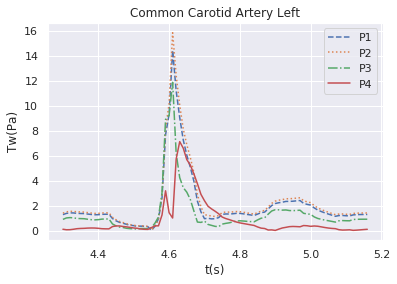

In [85]:
sns.set()
ax=NNP_70_30_30_30.plot(x='Time',y='cc1_left',linestyle='--')
NNP_70_30_30_30.plot(x='Time', y='cc2_left',linestyle=':', ax=ax)
NNP_70_30_30_30.plot(x='Time', y='cc3_left',linestyle='-.', ax=ax)
NNP_70_30_30_30.plot(x='Time', y='cc4_left',linestyle='-', ax=ax)

plt.xlabel('t(s)')
plt.ylabel('Tw(Pa)')
plt.title('Common Carotid Artery Left')
plt.legend(['P1','P2','P3','P4'])
plt.show()

In [ ]:
|